<a href="https://colab.research.google.com/github/piercepatrick/Titans_2019_FF_Analysis/blob/master/Ryan_Tannehill_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Statistical Analysis of Ryan Tannehill's 2019 Fantasy Football Season using Python** 

![alt text](https://static.clubs.nfl.com/image/private/t_editorial_landscape_8_desktop_mobile/f_auto/titans/uri6fr8vhrjsusquizlt.jpg)


After being traded for a fourth round pick from the Miami Dolphins to the Tennessee Titans in the midst of 2019 free agency, Ryan Tannehill joined a Titans team in the backup role to 5th year Marcus Mariota. After starting the season a mere 2-4, it was Tannehill's opportunity to jumpstart a struggling Tennessee offense with a first year offensive coordinator. Over the remaining 10 games, Tannehill led the Titans to a 7-3 record with key wins over the Kansas City Chiefs and Houston Texans, leading them back to NFL Playoffs. The Tannehill led Titans finished within the top 10 scoring offenses in the league, and Tannehill led the league in both yards per attempt and qb rating while also finishing third best in completion percentage. 

  During the Titan's playoff push, more than Titan's fans began to take notice of Tannehill. The 31 year old small market quarterback began to catch the eyes of many Fantasy Football team owners, as well. According to Tristan Crockett of ESPN, "Quarterback Ryan Tannehill and wide receiver A.J. Brown of the Tennessee Titans found themselves on a finalist's roster in 27.9% and 33.7% of ESPN leagues, the duo ranking among the five players who have seen the greatest such increase compared with their percentages of playoff qualifiers. Tannehill was on only 10.0% and Brown 9.8% of playoff teams, underscoring how important they have been on the add/drop front." 

Crockett writes, "Tannehill and Brown's 51.7 fantasy points in Weeks 14-15 combined were fourth-most among quarterbacks, and Brown's 59.0 PPR fantasy points were second-most behind only Thomas'." The emergence of Ryan Tannehill proved to be one of the defining moves in Fantasy leagues as both Tannehill's and AJ Browns average draft position was undrafted. Whichever owner decided Tannehill was at least worth a bench spot, was likely gearing up for their championship in week 16(like me). In a season where several QB's saw significant injuries (Ben Roelthisberger, Cam Newton, etc.) acquiring Tannehill off your league's waiver wire may have proved one of the best decisions of your season. As the Fantasy Footballers always say, leagues are won on the waiver wire, not at the draft. 

Tannehill's 2019 performance earned him a trip to his first pro bowl, AP/PFWA Comeback Player of the Year, two playoff wins, and a four-year extension worth 118 million including 62 million in fully guaranteed money and 91 million in total guarantees. However, this analysis serves to investigate how goood Tannehill really was, how he elevated the team, and if this production is sustainable.

![alt text](https://www.wkrn.com/wp-content/uploads/sites/73/2019/12/IMG_8476.jpg?w=800)

**Import Necessary Libraries**

In [1]:
!pip install brewer2mpl

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter1d
import warnings
warnings.filterwarnings(action='ignore')
warnings. simplefilter(action='ignore', category=Warning)
from pylab import rcParams
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.2.2
0.10.1


**Reading in data**

In [3]:
WEEKLY_BASE_URL = '/content/drive/My Drive/DS/Titans FF Analysis/data_v2/weekly/2019/week{}.csv'
YEARLY_BASE_URL = '/content/drive/My Drive/DS/Titans FF Analysis/data_v2/yearly/2019.csv'

# Generates a dataframe that has weekly stats of the 2019 season, and a dataframe that has 2019 yearly
# stats.
def generate_df():
  df = pd.DataFrame()
  for week in range(1, 18):
    weekly_df = pd.read_csv(WEEKLY_BASE_URL.format(week))
    weekly_df['Week'] = week
    df = pd.concat([df, weekly_df])
  return df

df = generate_df()
df_2019 = pd.read_csv(YEARLY_BASE_URL)

In [4]:
# Generates dataframe with play by play data since 1999
nflfastr_dir = '/content/drive/My Drive/nflfastR-data'
data_type = '.parquet'
files_to_load = [f"{nflfastr_dir}/data/{x}" for x in os.listdir(f"{nflfastr_dir}/data") if x.endswith(data_type)]
# this loads the data into a `pandas` dataframe and appends each file to the dataframe  
pbp_df = pd.DataFrame()
for fn in files_to_load:
  _df = pd.read_parquet(fn) 
  pbp_df = pbp_df.append(_df,ignore_index=True)

# this is for verification that we loaded in a bunch of data. This is the rows X columns of the dataframe
print(pbp_df.shape)

(996549, 322)


In [5]:
# Generates dataframe with fantasy stats from each year since 1970

YEAR_URL = '/content/drive/My Drive/DS/Titans FF Analysis/data_v2/yearly/{}.csv'

all_years_df = pd.DataFrame()
for year in range(1970, 2020):
  yearly_df = pd.read_csv(YEAR_URL.format(year))
  yearly_df['Year'] = year
  all_years_df = pd.concat([all_years_df, yearly_df]) 

In [13]:
# Weekly stats of the 2019 season
df.head()

,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,Rec,Tgt,ReceivingYds,ReceivingTD,FL,PPRFantasyPoints,StandardFantasyPoints,HalfPPRFantasyPoints,Week
0,Lamar Jackson,QB,BAL,324.0,5.0,0.0,20.0,17.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,33.56,33.56,33.56,1
1,Dak Prescott,QB,DAL,405.0,4.0,0.0,32.0,25.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,33.40,33.40,33.40,1
2,Robert Griffin,QB,BAL,55.0,1.0,0.0,6.0,6.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,7.10,7.10,7.10,1
3,Patrick Mahomes,QB,KAN,378.0,3.0,0.0,33.0,25.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,27.32,27.32,27.32,1
4,Kirk Cousins,QB,MIN,98.0,1.0,0.0,10.0,8.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,14.32,14.32,14.32,1


In [7]:
# 2019 Year stats
df_2019.head()

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,Int,Att.1,Yds.1,Tgt,Rec,Yds.2,Y/R,Fumbles,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints
0,0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,0.0,2.0,0.0,0.0,287.0,1387.0,142.0,116.0,1005.0,8.66,1.0,0.0,0.0,0.0,2.0,1387.0,15.0,287.0,1005.0,4.0,469.20
1,1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,265.0,401.0,3127.0,6.0,176.0,1206.0,0.0,0.0,0.0,0.00,9.0,2.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68
2,2,Derrick Henry,TEN,RB,25.0,15.0,15.0,0.0,0.0,0.0,0.0,303.0,1540.0,24.0,18.0,206.0,11.44,5.0,3.0,0.0,0.0,0.0,1540.0,16.0,303.0,206.0,2.0,294.60
3,3,Aaron Jones,GNB,RB,25.0,16.0,16.0,0.0,0.0,0.0,0.0,236.0,1084.0,68.0,49.0,474.0,9.67,3.0,2.0,0.0,0.0,0.0,1084.0,16.0,236.0,474.0,3.0,314.80
4,4,Ezekiel Elliott,DAL,RB,24.0,16.0,16.0,0.0,0.0,0.0,0.0,301.0,1357.0,71.0,54.0,420.0,7.78,3.0,2.0,0.0,0.0,0.0,1357.0,12.0,301.0,420.0,2.0,311.70


In [8]:
# Play by play data
pbp_df.head(3)

,play_id,game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,...,drive_yards_penalized,drive_start_transition,drive_end_transition,drive_game_clock_start,drive_game_clock_end,drive_start_yard_line,drive_end_yard_line,drive_play_id_started,drive_play_id_ended,away_score,home_score,location,result,total,spread_line,total_line,div_game,roof,surface,temp,wind,home_coach,away_coach,stadium_id,game_stadium,success,passer,rusher,receiver,pass,rush,first_down,special,play,passer_id,rusher_id,receiver_id,name,id,qb_epa
0,1.0,2017_01_ARI_DET,DET,ARI,REG,1,None,None,None,None,NaN,2017-09-10,900.0,1800.0,3600.0,Half1,0.0,NaN,0.0,1.0,NaN,0.0,15:00,None,0.0,NaN,GAME,None,NaN,0.0,0.0,NaN,0.0,0.0,0.0,None,None,NaN,NaN,None,...,NaN,None,None,None,None,None,None,NaN,NaN,23.0,35.0,Home,12.0,58.0,-2.5,48.5,0.0,dome,fieldturf,NaN,NaN,Jim Caldwell,Bruce Arians,DET00,Ford Field,NaN,None,None,None,0.0,0.0,NaN,0.0,0.0,None,None,None,None,None,NaN
1,37.0,2017_01_ARI_DET,DET,ARI,REG,1,ARI,away,DET,DET,35.0,2017-09-10,900.0,1800.0,3600.0,Half1,0.0,1.0,0.0,1.0,NaN,0.0,15:00,DET 35,0.0,19.0,2-K.Redfern kicks 65 yards from DET 35 to ARI ...,kickoff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN,None,...,0.0,KICKOFF,INTERCEPTION,15:00,12:00,ARI 23,ARI 42,37.0,207.0,23.0,35.0,Home,12.0,58.0,-2.5,48.5,0.0,dome,fieldturf,NaN,NaN,Jim Caldwell,Bruce Arians,DET00,Ford Field,0.0,None,None,None,0.0,0.0,0.0,1.0,0.0,None,None,None,None,None,-0.220588
2,73.0,2017_01_ARI_DET,DET,ARI,REG,1,ARI,away,DET,ARI,77.0,2017-09-10,894.0,1794.0,3594.0,Half1,0.0,1.0,0.0,1.0,1.0,0.0,14:54,ARI 23,10.0,19.0,(14:54) (Shotgun) 3-C.Palmer pass short right ...,pass,4.0,1.0,0.0,1.0,0.0,0.0,0.0,short,right,-2.0,6.0,None,...,0.0,KICKOFF,INTERCEPTION,15:00,12:00,ARI 23,ARI 42,37.0,207.0,23.0,35.0,Home,12.0,58.0,-2.5,48.5,0.0,dome,fieldturf,NaN,NaN,Jim Caldwell,Bruce Arians,DET00,Ford Field,0.0,C.Palmer,None,L.Fitzgerald,1.0,0.0,0.0,0.0,1.0,32013030-2d30-3032-3134-32391c8963bc,None,32013030-2d30-3032-3239-323176c2a1fa,C.Palmer,32013030-2d30-3032-3134-32391c8963bc,-0.081304


In [9]:
# 1970-2019 Yearly Stats
all_years_df.head()

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,Int,Att.1,Yds.1,Rec,Yds.2,Y/R,Fumbles,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Year,Tgt
0,0,Ron Johnson,NYG,RB,23.0,14.0,14.0,0.0,0.0,0.0,0.0,263.0,1027.0,48.0,487.0,10.15,5.0,0.0,0.0,0.0,0.0,1027.0,8.0,263.0,487.0,4.0,261.4,1970,NaN
1,1,Dick Gordon,CHI,WR,26.0,14.0,14.0,0.0,0.0,0.0,0.0,4.0,17.0,71.0,1026.0,14.45,2.0,0.0,0.0,0.0,0.0,17.0,0.0,4.0,1026.0,13.0,249.3,1970,NaN
2,2,Gene Washington,SFO,WR,23.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,1100.0,20.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1100.0,12.0,235.0,1970,NaN
3,3,Gary Garrison,SDG,WR,26.0,14.0,14.0,0.0,0.0,0.0,0.0,4.0,7.0,44.0,1006.0,22.86,0.0,0.0,0.0,0.0,0.0,7.0,0.0,4.0,1006.0,12.0,217.3,1970,NaN
4,4,MacArthur Lane,STL,RB,28.0,14.0,14.0,0.0,0.0,0.0,0.0,206.0,977.0,32.0,365.0,11.41,2.0,0.0,0.0,0.0,0.0,977.0,11.0,206.0,365.0,2.0,240.2,1970,NaN


**Data Manipulation**

In [12]:
# Renaming columns
df.rename({'Yds': 'PassingYDs',
'Yds.1': 'RushingYDs',
'Yds.2': 'ReceivingYDs'
}, axis=1, inplace=True)



df_2019.rename({'Yds': 'PassingYDs',
'Yds.1': 'RushingYDs',
'Yds.2': 'ReceivingYDs'
}, axis=1, inplace=True)


all_years_df.rename({'Yds': 'PassingYDs',
'Yds.1': 'RushingYDs',
'Yds.2': 'ReceivingYDs'}, axis=1, inplace=True)

In [14]:
# Dropping columns
df = df.drop(['HalfPPRFantasyPoints', 'StandardFantasyPoints'], axis = 1)
df.rename(columns = {'PPRFantasyPoints': 'FantasyPoints'}, inplace = True)

df_2019 = df_2019.drop(['Att', 'Att.1'], axis =1)

all_years_df = all_years_df.drop(['Att', 'Att.1'], axis =1)

In [60]:
# Adding Columns: Total Touchdowns, Usage, FantasyPoints/GM, and rankings to yearly tables
df['TotalTD'] = df['PassingTD'] + df['RushingTD'] + df['ReceivingTD']
df['Usage'] = df['Tgt'] + df['RushingAtt']

df_2019['TotalTD'] = df_2019['PassingTD'] + df_2019['RushingTD'] + df_2019['ReceivingTD']
df_2019['Usage'] = df_2019['Tgt'] + df_2019['RushingAtt']
df_2019['UsageRank'] = df_2019['Usage'].rank(ascending = False)
df_2019['FantasyPointsRank'] = df_2019['FantasyPoints'].rank(ascending = False)
df_2019['FantasyPoints/GM'] = df_2019['FantasyPoints'] / df_2019['G']
df_2019['FantasyPoints/GM_Rank'] = df_2019['FantasyPoints'].rank(ascending = False)
df_2019['FantasyPoints/GM'] = df_2019['FantasyPoints/GM'].apply(lambda x: round(x,2))

all_years_df['Usage'] = all_years_df['Tgt'] + all_years_df['RushingAtt']
all_years_df['UsageRank'] = all_years_df['Usage'].rank(ascending = False)
all_years_df['FantasyPointsRank'] = all_years_df['FantasyPoints'].rank(ascending = False)
all_years_df['FantasyPoints/GM'] = all_years_df['FantasyPoints'] / all_years_df['G']
all_years_df['FantasyPoints/GM_Rank'] = all_years_df['FantasyPoints'].rank(ascending = False)
all_years_df['FantasyPoints/GM'] = all_years_df['FantasyPoints/GM'].apply(lambda x: round(x,2))

In [16]:
# Sort by fantasy points per game for 2019
df_2019.sort_values('FantasyPoints/GM_Rank', ascending=True).head()

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,PassingYDs,Int,RushingYDs,Tgt,Rec,ReceivingYDs,Y/R,Fumbles,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Usage,UsageRank,FantasyPointsRank,FantasyPoints/GM,FantasyPoints/GM_Rank
0,0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,0.0,0.0,0.0,1387.0,142.0,116.0,1005.0,8.66,1.0,0.0,0.0,0.0,2.0,1387.0,15.0,287.0,1005.0,4.0,469.20,429.0,1.0,1.0,29.32,1.0
1,1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,265.0,3127.0,6.0,1206.0,0.0,0.0,0.0,0.00,9.0,2.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68,176.0,34.0,2.0,27.71,2.0
6,6,Michael Thomas,NOR,WR,26.0,16.0,15.0,0.0,0.0,0.0,-9.0,185.0,149.0,1725.0,11.58,1.0,0.0,0.0,0.0,0.0,-9.0,0.0,1.0,1725.0,9.0,374.60,186.0,30.0,3.0,23.41,3.0
11,11,Dak Prescott,DAL,QB,26.0,16.0,16.0,388.0,4902.0,11.0,277.0,0.0,0.0,0.0,0.00,6.0,2.0,4902.0,30.0,596.0,277.0,3.0,52.0,0.0,0.0,335.78,52.0,193.5,4.0,20.99,4.0
13,13,Russell Wilson,SEA,QB,31.0,16.0,16.0,341.0,4110.0,5.0,342.0,0.0,0.0,0.0,0.00,8.0,2.0,4110.0,31.0,516.0,342.0,3.0,75.0,0.0,0.0,326.60,75.0,139.5,5.0,20.41,5.0


In [17]:
# Sort by fantasy points per game for seasons 1970-2019
all_years_df.sort_values('FantasyPoints/GM_Rank', ascending=True).head()

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,PassingYDs,Int,RushingYDs,Rec,ReceivingYDs,Y/R,Fumbles,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Year,Tgt,Usage,UsageRank,FantasyPointsRank,FantasyPoints/GM,FantasyPoints/GM_Rank
0,0,LaDainian Tomlinson,SDG,RB,27.0,16.0,16.0,2.0,20.0,0.0,1815.0,56.0,508.0,9.07,2.0,1.0,20.0,2.0,3.0,1815.0,28.0,348.0,508.0,3.0,481.10,2006,80.0,428.0,22.0,1.0,30.07,1.0
0,0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,0.0,0.0,0.0,1387.0,116.0,1005.0,8.66,1.0,0.0,0.0,0.0,2.0,1387.0,15.0,287.0,1005.0,4.0,469.20,2019,142.0,429.0,20.0,2.0,29.32,2.0
0,0,Marshall Faulk,STL,RB,27.0,14.0,14.0,0.0,0.0,0.0,1359.0,81.0,830.0,10.25,0.0,0.0,0.0,0.0,0.0,1359.0,18.0,253.0,830.0,8.0,455.90,2000,113.0,366.0,134.0,3.0,32.56,3.0
0,0,Priest Holmes,KAN,RB,30.0,16.0,16.0,0.0,0.0,0.0,1420.0,74.0,690.0,9.32,1.0,1.0,0.0,0.0,1.0,1420.0,27.0,320.0,690.0,0.0,445.00,2003,90.0,410.0,40.5,4.0,27.81,4.0
2,2,LaDainian Tomlinson,SDG,RB,24.0,16.0,16.0,1.0,21.0,0.0,1645.0,100.0,725.0,7.25,2.0,0.0,21.0,1.0,1.0,1645.0,13.0,313.0,725.0,4.0,443.84,2003,137.0,450.0,11.0,5.0,27.74,5.0


McCaffery put up a historic season in 2019.

**Creating Data Tables with just Quarterbacks**

In [18]:
qb_df = df_2019.loc[df_2019['Pos'] == 'QB'].copy()
qb_df_week = df.loc[df['Pos'] == 'QB'].copy()

# Dropping irrelevant columns
qb_df.drop(['Rec', 'Tgt', 'ReceivingYDs', 'ReceivingTD', 'Y/R'], axis=1,inplace = True)
qb_df_week.drop(['Rec', 'Tgt', 'ReceivingYds', 'ReceivingTD'], axis=1,inplace = True)

# Creating a Yards per Attempt column
qb_df['Y/A'] = qb_df['PassingYDs'] / qb_df['PassingAtt']
qb_df_week['Y/A'] = qb_df_week['PassingYds'] / qb_df_week['PassingAtt']

In [19]:
# Visualize table to make sure it worked
qb_df.head()

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,PassingYDs,Int,RushingYDs,Fumbles,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,FantasyPoints,Usage,UsageRank,FantasyPointsRank,FantasyPoints/GM,FantasyPoints/GM_Rank,Y/A
1,1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,265.0,3127.0,6.0,1206.0,9.0,2.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,415.68,176.0,34.0,2.0,27.71,2.0,7.798005
11,11,Dak Prescott,DAL,QB,26.0,16.0,16.0,388.0,4902.0,11.0,277.0,6.0,2.0,4902.0,30.0,596.0,277.0,3.0,52.0,0.0,335.78,52.0,193.5,4.0,20.99,4.0,8.224832
13,13,Russell Wilson,SEA,QB,31.0,16.0,16.0,341.0,4110.0,5.0,342.0,8.0,2.0,4110.0,31.0,516.0,342.0,3.0,75.0,0.0,326.60,75.0,139.5,5.0,20.41,5.0,7.965116
16,16,Deshaun Watson,HOU,QB,24.0,15.0,15.0,333.0,3852.0,12.0,413.0,10.0,3.0,3852.0,26.0,495.0,413.0,7.0,82.0,6.0,318.98,83.0,127.0,6.0,21.27,6.0,7.781818
29,29,Jameis Winston,TAM,QB,25.0,16.0,16.0,380.0,5109.0,30.0,250.0,12.0,5.0,5109.0,33.0,626.0,250.0,1.0,59.0,0.0,297.36,59.0,172.0,10.0,18.59,10.0,8.161342


# **How did Ryan Tannehill compare to other top Quarterbacks?**

![Mahomes](https://www.puntsports.com.au/wp-content/uploads/2020/01/13932941-1.jpg)

In [38]:
# Lets filter out our 2019 qb data so it only includes QBs with over 200 pass attempts on the season.
qb_df = qb_df[qb_df['PassingAtt'] > 200]
list_of_players = qb_df['Player'].to_list()
qb_df_week = qb_df_week[qb_df_week['Player'].isin(list_of_players)]

**Creating a Dot Plot Distribution Visualization to show how Tannehill faired among relevant Quarterbacks**

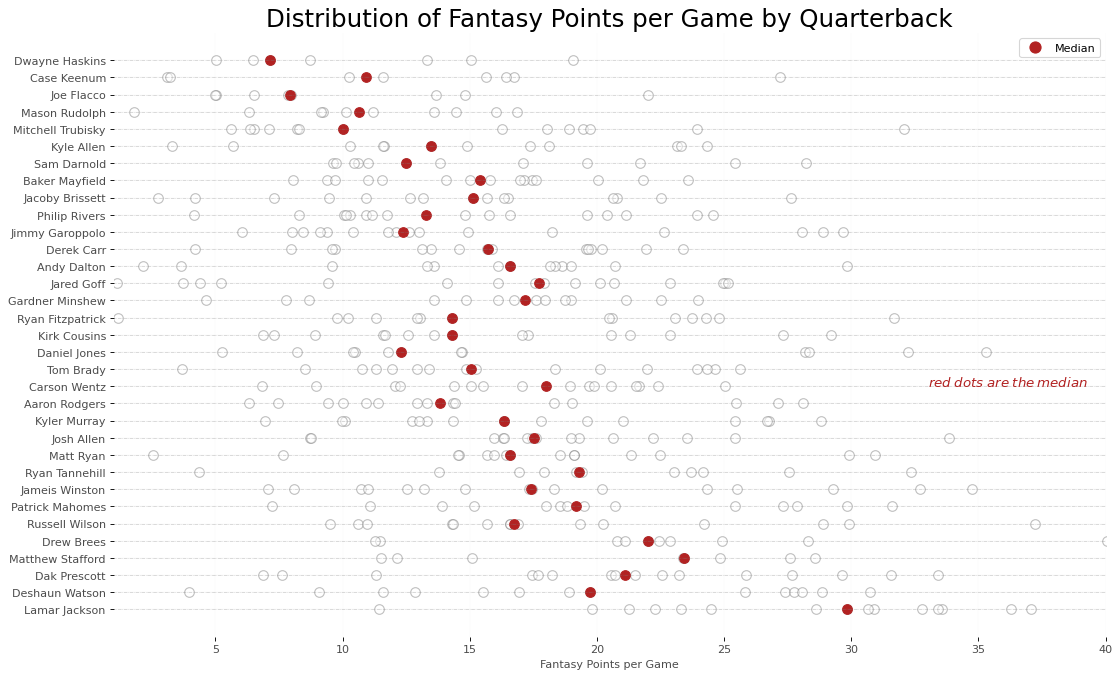

In [21]:
# Mean and Median Fantasy Points by QB
graph_df = qb_df_week[['FantasyPoints', 'Player']].groupby('Player').apply(lambda x: x.mean())
graph_df.sort_values('FantasyPoints', ascending=False, inplace=True)
graph_df.reset_index(inplace=True)
graph_df_median = qb_df_week[['FantasyPoints', 'Player']].groupby('Player').apply(lambda x: x.median())

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=graph_df.index, xmin=0, xmax=40, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

# Draw the Dots
for i, qb in enumerate(graph_df.Player):
    df_qb = qb_df_week.loc[qb_df_week.Player==qb, :]
    ax.scatter(y=np.repeat(i, df_qb.shape[0]), x=df_qb.FantasyPoints, s=75, edgecolors='gray', c='w', alpha=0.5)
    ax.scatter(y=i, x='FantasyPoints', data=graph_df_median.loc[graph_df_median.index==qb, :], s=75, c='firebrick')

# Annotate    
ax.text(33, 13, "$red \; dots \; are \; the \: median$", fontdict={'size':12}, color='firebrick')

# Decorations
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='firebrick', label="Median")
plt.legend(handles=red_patch)
ax.set_title('Distribution of Fantasy Points per Game by Quarterback', fontdict={'size':22})
ax.set_xlabel('Fantasy Points per Game', alpha=0.7)
ax.set_yticks(graph_df.index)
ax.set_yticklabels(graph_df.Player.str.title(), fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.set_xlim(1, 40)
plt.xticks(alpha=0.7)
plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["bottom"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)   
plt.grid(axis='both', alpha=.4, linewidth=.1)
plt.show()

Tannehill finished within the top 10 for Fantasy Points per Game, and this visualization is including Week 6 when Tannehill replaced Mariota midway through the 3rd quarter.

In [22]:
# Reading in a table that compares Tannehill, Mahomes, Wilson, and Jackson
top_qbs = pd.read_csv('/content/drive/My Drive/DS/Titans FF Analysis/QBs - Sheet1 - QBs - Sheet1 (1).csv')
top_qbs.set_index('Week', drop = True, inplace = True)
top_qbs.head()

,Tannehill,Mahomes,Wilson,Jackson
Week,,,,
1,NaN,27.32,16.60,33.56
2,NaN,31.62,24.20,30.88
3,NaN,27.86,41.34,21.28
4,NaN,18.00,14.30,24.48
5,NaN,18.54,29.92,11.44


**Visualizing Tannehill vs Mahomes, Wilson, and Jackson from Weeks 7-17**

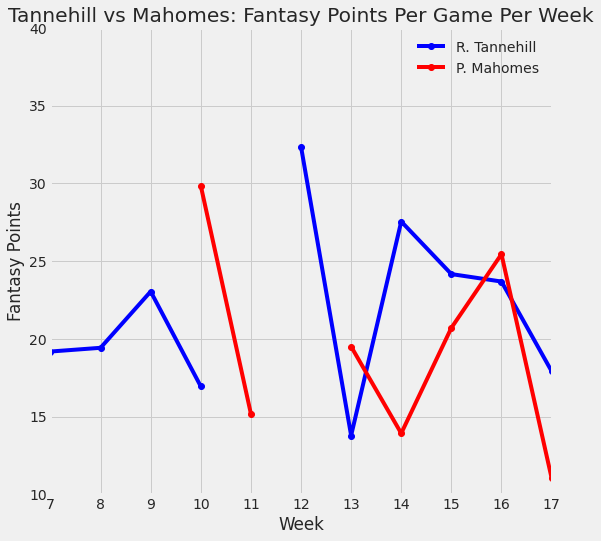

In [27]:
# Set figure size
rcParams['figure.figsize'] = 8, 8
# Line plots for Tannehill and Mahomes
tannehill, = plt.plot(top_qbs.Tannehill, 'o-', color='blue')
mahomes, = plt.plot(top_qbs.Mahomes, 'o-',color = 'red') 
# Set Style
plt.style.use('fivethirtyeight')
# Title and label
plt.title('Tannehill vs Mahomes: Fantasy Points Per Game Per Week')
plt.xlabel('Week')
plt.ylabel('Fantasy Points')
# Axis bounds
plt.xlim(7,17)
plt.ylim(10,40)
# Axis intervals
plt.yticks([10, 15, 20,25,30,35,40])
plt.xticks([7,8,9,10,11,12,13,14,15,16,17])
# Set legend
plt.legend([tannehill, mahomes], ['R. Tannehill', 'P. Mahomes'])

plt.style.use('fivethirtyeight')

Who else to compare Tannehill to first other than the best quarterback in football, Patrick Mahomes. Mahomes missed several weeks midseason to injury, but came back in week 10 to beat the Titans and outscore Tannehill. However, Tannehill finished the season strong with 4 of his 5 games between weeks 12 and 16 scoring at least 20.

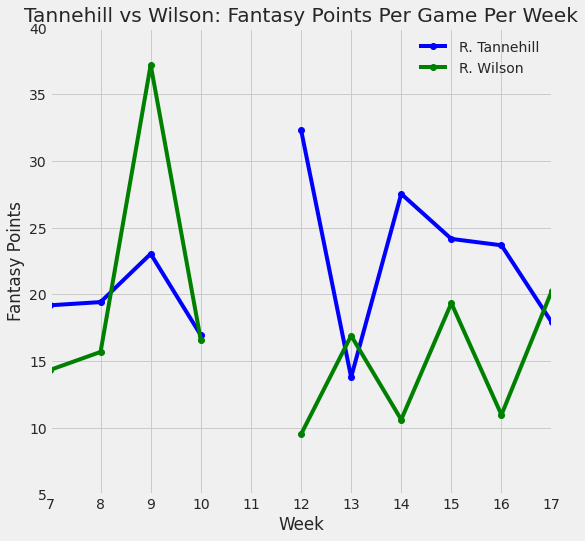

In [28]:
rcParams['figure.figsize'] = 8, 8
tannehill, = plt.plot(top_qbs.Tannehill, 'o-', color='blue') 
wilson, = plt.plot(top_qbs.Wilson, 'o-', color = 'green')
plt.title('Tannehill vs Wilson: Fantasy Points Per Game Per Week')
plt.xlabel('Week')
plt.ylabel('Fantasy Points')
plt.xlim(7,17)
plt.ylim(5,40)
plt.yticks([5,10, 15, 20,25,30,35,40])
plt.xticks([7,8,9,10,11,12,13,14,15,16,17])
plt.legend([tannehill, wilson], ['R. Tannehill', 'R. Wilson'])
plt.style.use('fivethirtyeight')

Aside from week 13 and a monster week from Russell Wilson in week 9, Tannehill outscored Wilson regularly.

Tannehill's 178.4 fantasy points since taking over as the Titans' starting quarterback in Week 7 ranked third-best at the position and fifth-best overall.

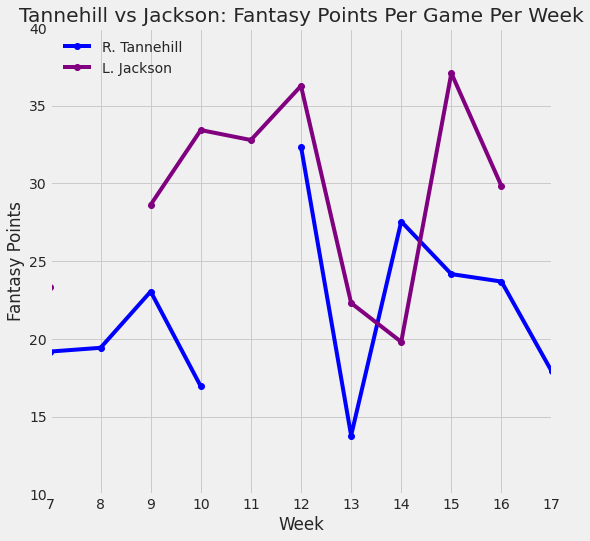

In [29]:
rcParams['figure.figsize'] = 8, 8
tannehill, = plt.plot(top_qbs.Tannehill, 'o-', color = 'blue') 
jackson, = plt.plot(top_qbs.Jackson, 'o-', color = 'Purple')
plt.title('Tannehill vs Jackson: Fantasy Points Per Game Per Week')
plt.xlabel('Week')
plt.ylabel('Fantasy Points')
plt.xlim(7,17)
plt.ylim(10,40)
plt.yticks([10, 15, 20,25,30,35,40])
plt.xticks([7,8,9,10,11,12,13,14,15,16,17])
plt.legend([tannehill, jackson], ['R. Tannehill', 'L. Jackson'])
plt.style.use('fivethirtyeight')

Tannehill faired well against the consensus top 3 quarterbacks, but league MVP Lamar Jackson outscored him every week but one. Jackson's rushing ability gives him fantasy value like no other quarterback, so it's not suprising to see Jackson's worst week be 20 points.

He still lost to Tannehill in the playoffs ;)

**Visualizing Tannehill vs Playoff Quarterbacks from Weeks 7-17**

Text(0.5, 1.0, "Fantasy Points per Game for AFC Playoff QB's")

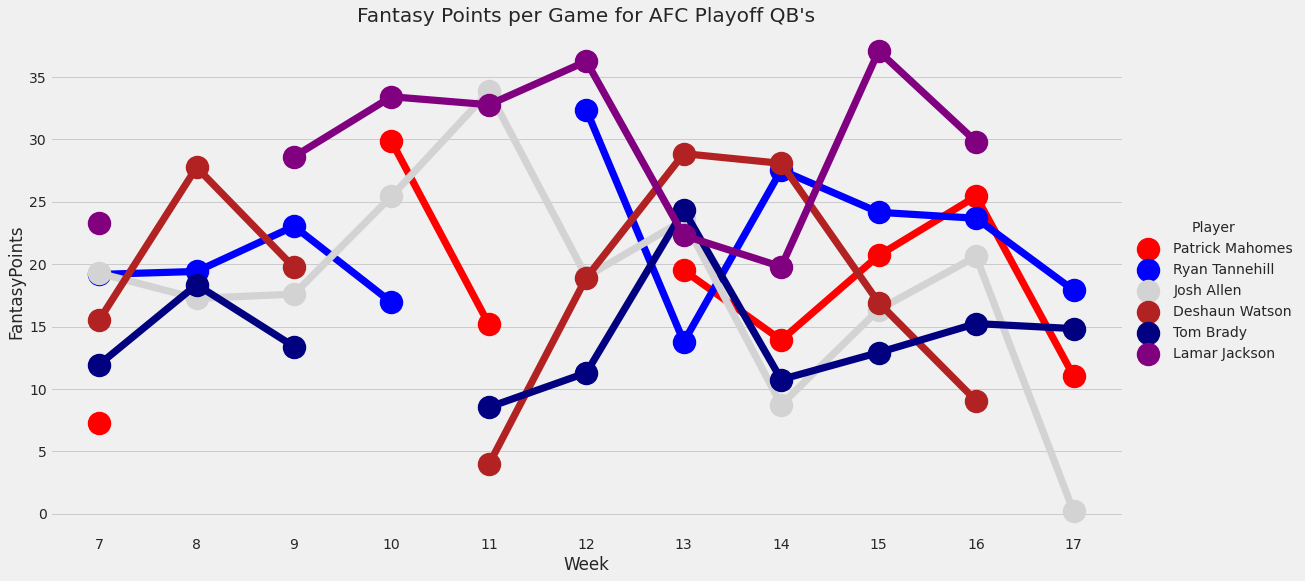

In [30]:
# Create Data frame called afc, that contains data only on afc playoff quarterbacks
afc = qb_df_week[(qb_df_week['Player'] == 'Ryan Tannehill') | (qb_df_week['Player'] == 'Patrick Mahomes') |
                (qb_df_week['Player'] == 'Lamar Jackson') | (qb_df_week['Player'] == 'Tom Brady') |
                (qb_df_week['Player'] == 'Deshaun Watson') | (qb_df_week['Player'] == 'Josh Allen')]
# Filter for weeks 7-17
afc = afc[afc['Week'] >= 7]
# Plot afc data 
sns.factorplot( x='Week', y='FantasyPoints', data = afc, hue='Player', size = 8, aspect = 2, palette=['red','blue', 'lightgray', 'firebrick', 'navy', 'purple'])
plt.title("Fantasy Points per Game for AFC Playoff QB's")

Text(0.5, 1.0, "Fantasy Points per Game for NFC Playoff QB's vs Ryan Tannehill")

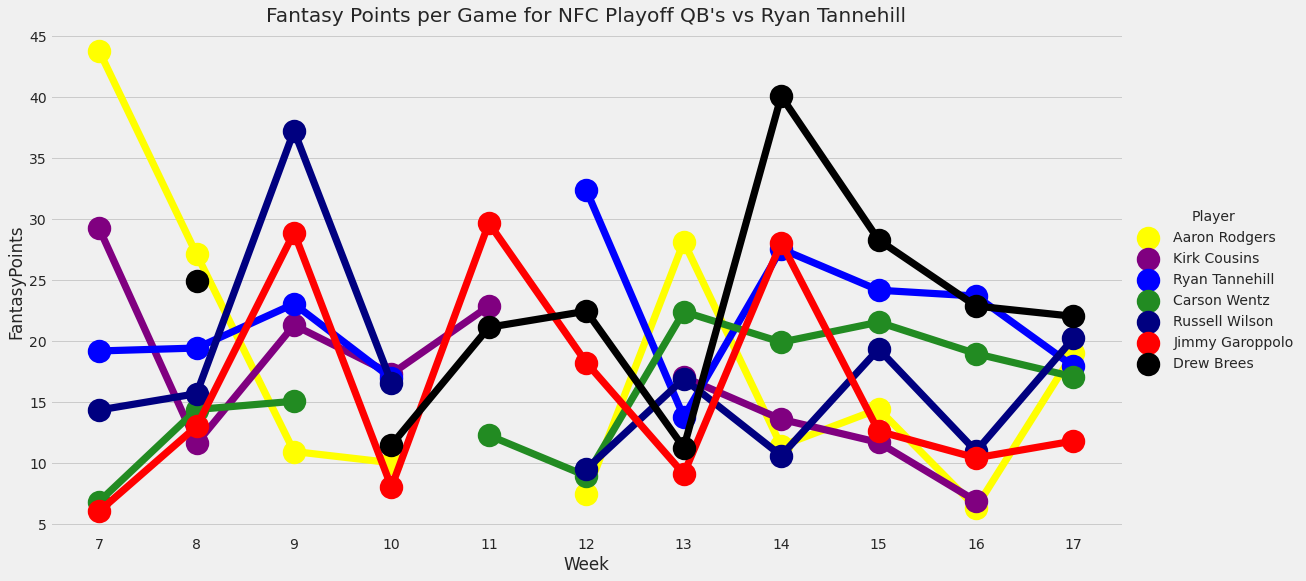

In [31]:
# Create Data frame called nfc, that contains data only on nfc playoff quarterbacks and Ryan Tannehill
nfc = qb_df_week[(qb_df_week['Player'] == 'Jimmy Garoppolo') | (qb_df_week['Player'] == 'Russell Wilson') |
                (qb_df_week['Player'] == 'Drew Brees') | (qb_df_week['Player'] == 'Kirk Cousins') |
                (qb_df_week['Player'] == 'Ryan Tannehill') | (qb_df_week['Player'] == 'Aaron Rodgers')
                | (qb_df_week['Player'] == 'Carson Wentz')]
# Filter for weeks 7-17
nfc = nfc[nfc['Week'] >= 7]
# Plot nfc data
sns.factorplot( x='Week', y='FantasyPoints', data = nfc, hue='Player', size = 8, aspect = 2, palette=['yellow','purple', 'blue', 'forestgreen', 'navy', 'red','black'])
plt.title("Fantasy Points per Game for NFC Playoff QB's vs Ryan Tannehill")

In the last quarter of the season, Drew Brees was the only quarterback to outperform him. Garoppolo looks very inconsistent.



**Showcasing statistics for Tannehill, Brees, and Winston**

In [36]:
# Filter to only include games where passing attempts are above 10
qb_df_week = qb_df_week[qb_df_week['PassingAtt'] >= 10]

In [41]:
# Filter for Ryan Tannehill
rt = qb_df_week.groupby('Player').get_group('Ryan Tannehill')
# Display these columns
columns = ['Week', 'PassingYds', 'PassingTD', 'PassingAtt', 'Cmp', 'RushingAtt', 'RushingYds', 'RushingTD', 'FL', 'Int', 'FantasyPoints']
rt = rt[columns]
# Weeks 
rt = rt[rt['Week'] >= 7]
rt.describe()

,Week,PassingYds,PassingTD,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,FL,Int,FantasyPoints
count,10.000000,10.0000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,12.100000,259.8000,2.200000,27.000000,18.800000,4.000000,18.100000,0.400000,0.300000,0.500000,21.802000
std,3.478505,71.5461,0.632456,7.333333,4.732864,1.563472,15.437688,0.699206,0.483046,0.707107,5.483571
min,7.000000,181.0000,1.000000,18.000000,13.000000,1.000000,-3.000000,0.000000,0.000000,0.000000,13.780000
25%,9.250000,194.2500,2.000000,20.500000,14.750000,3.250000,7.250000,0.000000,0.000000,0.000000,18.235000
50%,12.500000,265.5000,2.000000,27.000000,19.000000,4.000000,14.500000,0.000000,0.000000,0.000000,21.230000
75%,14.750000,303.7500,2.750000,32.000000,21.750000,4.750000,32.750000,0.750000,0.750000,1.000000,24.040000
max,17.000000,391.0000,3.000000,39.000000,27.000000,7.000000,40.000000,2.000000,1.000000,2.000000,32.360000


Ryan Tannehill's fantasy points had a standard deviation of 5.48 which is quite low and shows us he was rather consistent. His worst game was 13.78 points and his best game was 32.36. His minimum passing attempts in a game was 18 which is lower than I imagined since Henry was running very well towards the end of the season.

This table does not inlcude Week 6, but only includes games he started.

In [43]:
brees = qb_df_week.groupby('Player').get_group('Drew Brees')
brees = brees[columns]
brees.describe()

,Week,PassingYds,PassingTD,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,FL,Int,FantasyPoints
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000
mean,11.700000,294.100000,2.700000,37.300000,27.800000,0.900000,-0.400000,0.100000,0.0,0.300000,22.524000
std,4.667857,61.383041,1.418136,5.774465,5.329165,1.197219,1.074968,0.316228,0.0,0.483046,8.168698
min,1.000000,184.000000,0.000000,30.000000,18.000000,0.000000,-3.000000,0.000000,0.0,0.000000,11.260000
25%,10.250000,259.500000,2.250000,31.250000,27.250000,0.000000,-0.750000,0.000000,0.0,0.000000,20.880000
50%,12.500000,297.000000,3.000000,38.500000,29.000000,0.500000,0.000000,0.000000,0.0,0.000000,22.230000
75%,14.750000,339.500000,3.000000,42.250000,31.500000,1.000000,0.000000,0.000000,0.0,0.750000,24.405000
max,17.000000,373.000000,5.000000,45.000000,34.000000,3.000000,1.000000,1.000000,0.0,1.000000,40.060000


Although Brees outscored Tannehill in Points per Game, Brees finished with a higher standard deviation. He may have been more productive on average, but he was a little less consistent. 

Another Takeaway: Brees passes A LOT. (Minimum 30 passsing attempts, maximum 45)

In [44]:
jw = qb_df_week.groupby('Player').get_group('Jameis Winston')
jw = jw[columns]
jw.describe()

,Week,PassingYds,PassingTD,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,FL,Int,FantasyPoints
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0000,16.00000,16.000000,16.000000
mean,9.125000,319.312500,2.062500,39.125000,23.750000,3.687500,15.625000,0.0625,0.31250,1.875000,18.585000
std,5.188127,86.737703,1.236595,9.507015,6.234314,2.301268,15.688106,0.2500,0.60208,1.586401,8.576895
min,1.000000,194.000000,0.000000,24.000000,13.000000,1.000000,-1.000000,0.0000,0.00000,0.000000,7.060000
25%,4.750000,253.000000,1.000000,31.750000,19.500000,2.000000,4.750000,0.0000,0.00000,0.750000,12.155000
50%,9.500000,324.000000,2.000000,41.500000,24.000000,3.000000,11.000000,0.0000,0.00000,2.000000,17.400000
75%,13.250000,381.250000,3.000000,45.750000,29.250000,5.250000,20.750000,0.0000,0.25000,3.000000,24.615000
max,17.000000,458.000000,4.000000,54.000000,33.000000,8.000000,53.000000,1.0000,2.00000,5.000000,34.740000


I couldn't not look into one of the most interesting quarterback seasons of last year in Jameis Winston. 33 touchdown passes coupled with 30 interceptions made Winston a scary play each week. It was almost as if he had to throw an interception each week to get himself going. Thankfully, that did not kill Winston because he always kept slinging it and ended the season with the most passing yards and second in passing touchdowns. However, his standard deviation is also higher than Tannehill's.

In [46]:
# New Data frame weeks 7-17
week7 = qb_df_week.loc[qb_df_week['Week'] >= 7]
# Create Games Played column
week7['GamesPlayed'] = week7.groupby('Player')['Week'].transform('count')
# Display most consistent players
week7.groupby(['Player', 'GamesPlayed'])[['FantasyPoints']].std().sort_values(by= 'FantasyPoints', ascending=True).head(10)

,,FantasyPoints
Player,GamesPlayed,
Joe Flacco,2,0.947523
Matthew Stafford,3,2.670905
Tom Brady,10,4.486771
Baker Mayfield,10,4.991938
Mason Rudolph,6,5.083664
Dwayne Haskins,7,5.193004
Carson Wentz,10,5.241756
Philip Rivers,10,5.405078
Ryan Tannehill,10,5.483571


From Weeks 7-17 Tannehill proved to be one of the most consistent quarterbacks for fantasy point production.

# **How much did the Marcus Mariota to Ryan Tannehill switch in Week 7 affect the offense's Fantasy Football performance?**

![alt text](https://images2.minutemediacdn.com/image/fetch/c_fill,g_auto,f_auto,h_2134,w_3200/https%3A%2F%2Ftitansized.com%2Fwp-content%2Fuploads%2Fgetty-images%2F2016%2F04%2F1184514987.jpeg)

In [63]:
# Finding AJ Brown's data in 2019 weekly DataFrame
ajbrown = df.loc[df['Player'] == 'A.J. Brown']

# Finding Jonnu Smith's data in the 2019 weekly DataFrame
jonnusmith = df.loc[df['Player'] == 'Jonnu Smith']

# Finding Derrick Henry's data in the 2019 weekly DataFrame
derrickhenry = df.loc[df['Player'] == 'Derrick Henry']

**A.J. Brown**

In [49]:
# Grab AJ Browns points before and after week 7
ajbrown_mean_fpts_before_week_7 = ajbrown.loc[(ajbrown['Week'] > 0) & (ajbrown['Week'] < 7), ['FantasyPoints']].mean().values[0]
ajbrown_mean_fpts_after_week_7 = ajbrown.loc[(ajbrown['Week'] >= 7), ['FantasyPoints']].mean().values[0]

print('AJ Brown\'s mean fantasy points with Marcus Mariota:', ajbrown_mean_fpts_before_week_7)
print('AJ Brown\'s mean fantasy points with Ryan Tannehill:', ajbrown_mean_fpts_after_week_7)

AJ Brown's mean fantasy points with Marcus Mariota: 8.883333333333333
AJ Brown's mean fantasy points with Ryan Tannehill: 16.380000000000003


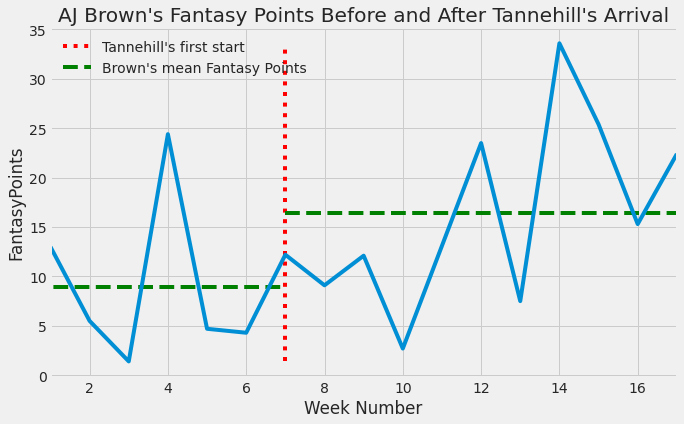

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(ajbrown['Week'], ajbrown['FantasyPoints'])
plt.title('AJ Brown\'s Fantasy Points Before and After Tannehill\'s Arrival')
plt.xlabel('Week Number')
plt.ylabel('FantasyPoints')
plt.vlines(7, ymin=ajbrown['FantasyPoints'].min(), ymax=ajbrown['FantasyPoints'].max(), color='red', linestyles='dotted', label='Tannehill\'s first start')
plt.hlines(ajbrown_mean_fpts_before_week_7, xmin=0, xmax=7, color='green' ,linestyles='dashed', label='Brown\'s mean Fantasy Points')
plt.hlines(ajbrown_mean_fpts_after_week_7, xmin=7, xmax=17, color='green', linestyles='dashed')
plt.xlim(1,17)
plt.legend()

In [51]:
ajbrown_mean_tgts_before_week_7 = ajbrown.loc[(ajbrown['Week'] > 0) & (ajbrown['Week'] < 7), ['Tgt']].mean().values[0]
ajbrown_mean_tgts_after_week_7 = ajbrown.loc[(ajbrown['Week'] >= 7), ['Tgt']].mean().values[0]

print('AJ Brown\'s mean targets with Marcus Mariota:', ajbrown_mean_tgts_before_week_7)
print('AJ Brown\'s mean targets with Ryan Tannehill:', ajbrown_mean_tgts_after_week_7)

AJ Brown's mean targets with Marcus Mariota: 3.8333333333333335
AJ Brown's mean targets with Ryan Tannehill: 6.1


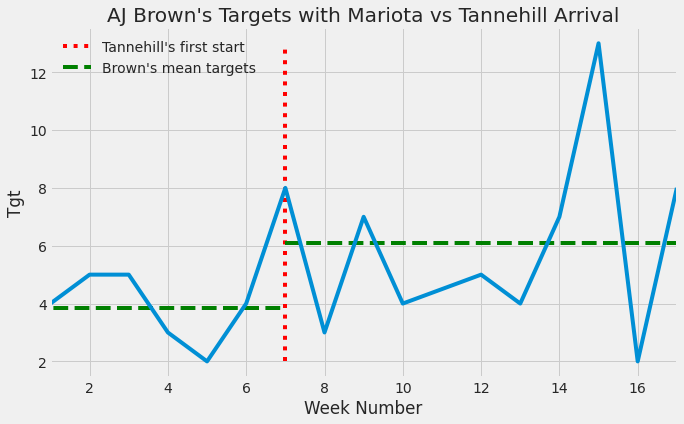

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(ajbrown['Week'], ajbrown['Tgt'])
plt.title('AJ Brown\'s Targets with Mariota vs Tannehill Arrival')
plt.xlabel('Week Number')
plt.ylabel('Tgt')
plt.vlines(7, ymin=ajbrown['Tgt'].min(), ymax=ajbrown['Tgt'].max(), color='red', linestyles='dotted', label='Tannehill\'s first start')
plt.hlines(ajbrown_mean_tgts_before_week_7, xmin=0, xmax=7, color='green' ,linestyles='dashed', label='Brown\'s mean targets')
plt.hlines(ajbrown_mean_tgts_after_week_7, xmin=7, xmax=17, color='green', linestyles='dashed')
plt.xlim(1,17)
plt.legend()

A.J. Brown's fantasy points and targets nearly doubled with Tannehill at the helm.

**Jonnu Smith**

In [53]:
jonnusmith_mean_fpts_before_week_7 = jonnusmith.loc[(jonnusmith['Week'] > 0) & (jonnusmith['Week'] < 7), ['FantasyPoints']].mean().values[0]
jonnusmith_mean_fpts_after_week_7 = jonnusmith.loc[(jonnusmith['Week'] >= 7), ['FantasyPoints']].mean().values[0]

print('Jonnu Smith\'s mean fantasy points with Marcus Mariota:', jonnusmith_mean_fpts_before_week_7)
print('Jonnu Smith\'s mean fantasy points with Ryan Tannehill:', jonnusmith_mean_fpts_after_week_7)

Jonnu Smith's mean fantasy points with Marcus Mariota: 3.34
Jonnu Smith's mean fantasy points with Ryan Tannehill: 8.8


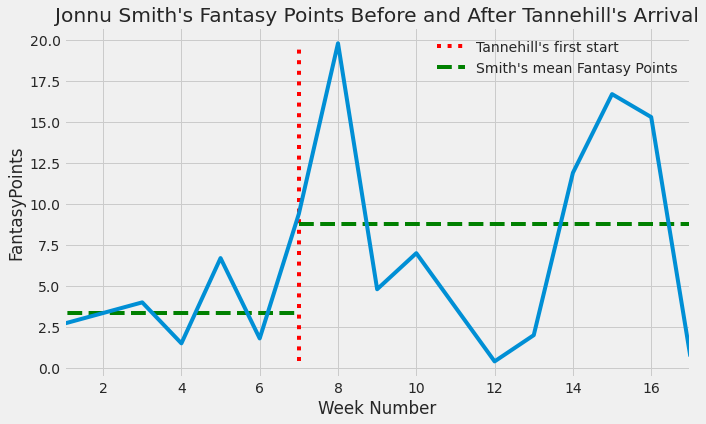

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(jonnusmith['Week'], jonnusmith['FantasyPoints'])
plt.title('Jonnu Smith\'s Fantasy Points Before and After Tannehill\'s Arrival')
plt.xlabel('Week Number')
plt.ylabel('FantasyPoints')
plt.vlines(7, ymin=jonnusmith['FantasyPoints'].min(), ymax=jonnusmith['FantasyPoints'].max(), color='red', linestyles='dotted', label='Tannehill\'s first start')
plt.hlines(jonnusmith_mean_fpts_before_week_7, xmin=0, xmax=7, color='green' ,linestyles='dashed', label='Smith\'s mean Fantasy Points')
plt.hlines(jonnusmith_mean_fpts_after_week_7, xmin=7, xmax=17, color='green', linestyles='dashed')
plt.xlim(1,17)
plt.legend()

In [55]:
jonnusmith_mean_tgts_before_week_7 = jonnusmith.loc[(jonnusmith['Week'] > 0) & (jonnusmith['Week'] < 7), ['Tgt']].mean().values[0]
jonnusmith_mean_tgts_after_week_7 = jonnusmith.loc[(jonnusmith['Week'] >= 7), ['Tgt']].mean().values[0]

print('Jonnu Smith\'s mean targets with Marcus Mariota:', jonnusmith_mean_tgts_before_week_7)
print('Jonnu Smith\'s mean targets with Ryan Tannehill:', jonnusmith_mean_tgts_after_week_7)

Jonnu Smith's mean targets with Marcus Mariota: 1.6
Jonnu Smith's mean targets with Ryan Tannehill: 3.6


Smith, a breakout candidate for the 2020 season, showed a lot of potential with Tannehill. He showed flashes of stardom last season, and also increased in both fantasy points and targets with Tannehill.

**Derrick Henry**

In [56]:
derrickhenry_mean_fpts_before_week_7 = derrickhenry.loc[(derrickhenry['Week'] > 0) & (derrickhenry['Week'] < 7), ['FantasyPoints']].mean().values[0]
derrickhenry_mean_fpts_after_week_7 = derrickhenry.loc[(derrickhenry['Week'] >= 7), ['FantasyPoints']].mean().values[0]

print('Derrick Henry\'s mean fantasy points with Marcus Mariota:', derrickhenry_mean_fpts_before_week_7)
print('Derrick Henry\'s mean fantasy points with Ryan Tannehill:', derrickhenry_mean_fpts_after_week_7)

Derrick Henry's mean fantasy points with Marcus Mariota: 14.633333333333333
Derrick Henry's mean fantasy points with Ryan Tannehill: 22.977777777777774


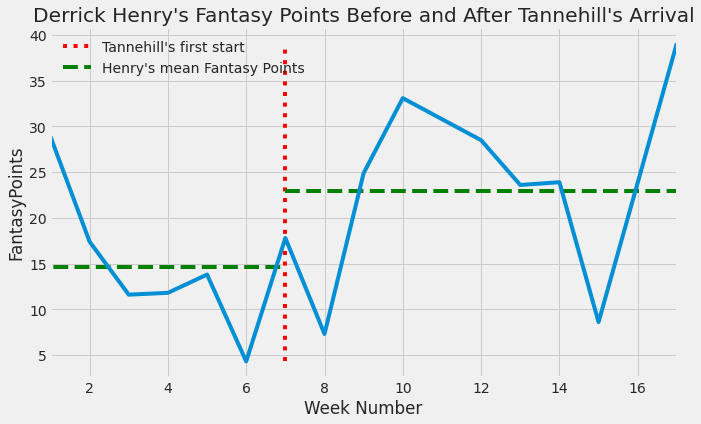

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(derrickhenry['Week'], derrickhenry['FantasyPoints'])
plt.title('Derrick Henry\'s Fantasy Points Before and After Tannehill\'s Arrival')
plt.xlabel('Week Number')
plt.ylabel('FantasyPoints')
plt.vlines(7, ymin=derrickhenry['FantasyPoints'].min(), ymax=derrickhenry['FantasyPoints'].max(), color='red', linestyles='dotted', label='Tannehill\'s first start')
plt.hlines(derrickhenry_mean_fpts_before_week_7, xmin=0, xmax=7, color='green' ,linestyles='dashed', label='Henry\'s mean Fantasy Points')
plt.hlines(derrickhenry_mean_fpts_after_week_7, xmin=7, xmax=17, color='green', linestyles='dashed')
plt.xlim(1,17)
plt.legend()

In [64]:
derrickhenry_mean_usage_before_week_7 = derrickhenry.loc[(derrickhenry['Week'] > 0) & (derrickhenry['Week'] < 7), ['Usage']].mean().values[0]
derrickhenry_mean_usage_after_week_7 = derrickhenry.loc[(derrickhenry['Week'] >= 7), ['Usage']].mean().values[0]

print('Derrick Henry\'s mean usage with Marcus Mariota:', derrickhenry_mean_usage_before_week_7)
print('Derrick Henry\'s mean usage with Ryan Tannehill:', derrickhenry_mean_usage_after_week_7)

Derrick Henry's mean usage with Marcus Mariota: 20.666666666666668
Derrick Henry's mean usage with Ryan Tannehill: 22.444444444444443


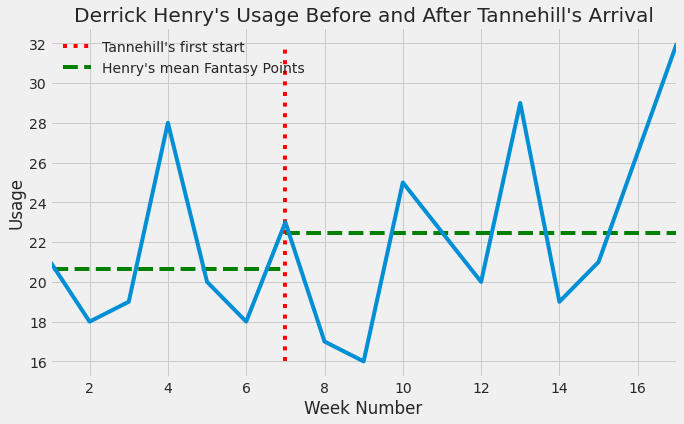

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(derrickhenry['Week'], derrickhenry['Usage'])
plt.title('Derrick Henry\'s Usage Before and After Tannehill\'s Arrival')
plt.xlabel('Week Number')
plt.ylabel('Usage')
plt.vlines(7, ymin=derrickhenry['Usage'].min(), ymax=derrickhenry['Usage'].max(), color='red', linestyles='dotted', label='Tannehill\'s first start')
plt.hlines(derrickhenry_mean_usage_before_week_7, xmin=0, xmax=7, color='green' ,linestyles='dashed', label='Henry\'s mean Fantasy Points')
plt.hlines(derrickhenry_mean_usage_after_week_7, xmin=7, xmax=17, color='green', linestyles='dashed')
plt.xlim(1,17)
plt.legend()

Derrick Henry saw a significant boost in fantasy points per game despite having a similar usage (carries + targets) with each quarterback. Although this could show to defenses respecting the pass more, Henrys step up in production is likely due to improved offensive line play and defenses getting worn down toward the end of the season. Henry is not much of a pass catching back, and Tannehill nor Mariota hardly looked to him for checkdowns.

# **Did Ryan Tannehill over-perform in the 2019-2020 season, and is he due for a regression in the 2020-2021 season?**

![alt text](https://img.bleacherreport.net/img/images/photos/003/850/388/3853df8114e938181ca9da3f1d864048_crop_north.jpg?1580619720&w=3072&h=2048)

**Generating a Probability Distribution which Displays the Probability of Scoring a Passing Touchdown when a team is X Yards Away from the Endzone**

In [66]:
# Creat data frame with play by play data from only 2019
pbp2019 = pbp_df.loc[pbp_df['season'] == 2019]

In [69]:
def generate_prob_based_off_ydline(output_variable, filter_variable, df=pbp_df, smoothing_sigma=2):
    
    distance_from_100_yd_line = pbp_df['yardline_100']
    output_column = pbp_df[output_variable]
    filter_column = pbp_df[filter_variable]
    two_point_attempt = pbp_df['two_point_attempt']
    
    df_values = {
    'DistanceFromEndzone': distance_from_100_yd_line,
    output_variable: output_column,
    filter_variable: filter_column,
    'two_point_attempt': two_point_attempt
    }
    
    df = pd.DataFrame(df_values)
    
    df = df[df[filter_variable] == 1]
    #remove two point plays
    df = df[df['two_point_attempt'] == 0]
    df.drop([filter_variable, 'two_point_attempt'], axis=1, inplace=True)
    
    norm_df = df.groupby('DistanceFromEndzone')[output_variable].value_counts(normalize=True)
    norm_df = pd.DataFrame({'p': norm_df.values.flatten()}, index=norm_df.index)
    norm_df = norm_df[norm_df.index.get_level_values(output_variable) == 1].reset_index()
    
    #smooth out our probabilities
    norm_df['p_smoothed'] = gaussian_filter1d(norm_df['p'], sigma=smoothing_sigma)
    
    norm_df.drop(output_variable, axis=1, inplace=True)
    return norm_df

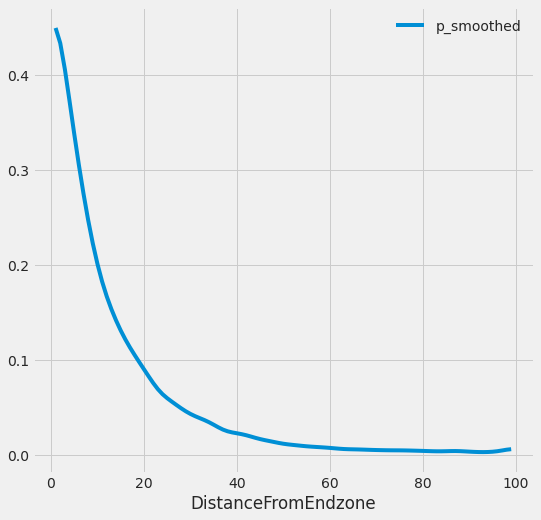

In [70]:
passing_df = generate_prob_based_off_ydline(*passing_columns)

passing_df.plot(x='DistanceFromEndzone', y='p_smoothed')

Probability of scoring a passing touchdown decreases as the distance from the end zone increases.

In [71]:
passing_data2019 = pbp2019

#phrases we do not want in data. Irrelevant data
bad_phrases = [
    'NO PLAY', 'REVERSED', 'POINT CONVERSION ATTEMPT', 
    'EXTRA POINT', 'FIELD GOAL', 'TIMEOUT', 'TWO-MINUTE WARNING', 'END QUARTER', 'PUNT',
    'KNEELS', 'KICKS', 'END GAME'
]

#remove play descriptions with phrases from bad_phrases list
for phrase in bad_phrases:
    passing_data2019 = passing_data2019[~passing_data2019['desc'].str.contains(phrase)]


#only include a play if it is a passing play and not a two point conversion
passing_data2019 = passing_data2019[(passing_data2019['pass_attempt'] == 1) & (passing_data2019['two_point_attempt'] == 0)]
passing_data2019 = passing_data2019[['yardline_100', 'passer', 'desc','pass_touchdown']]

passing_data2019.sort_values(by='yardline_100').head(15)

,yardline_100,passer,desc,pass_touchdown
124886,1.0,D.Haskins,(2:00) 7-D.Haskins pass incomplete short middl...,0.0
120684,1.0,B.Mayfield,(4:04) 6-B.Mayfield pass incomplete short righ...,0.0
102665,1.0,J.Flacco,(6:08) 5-J.Flacco pass incomplete short left t...,0.0
97380,1.0,P.Rivers,(3:00) 17-P.Rivers pass short right to 30-A.Ek...,1.0
124084,1.0,J.Brissett,(8:54) (Shotgun) 7-J.Brissett pass short right...,1.0
136651,1.0,J.Allen,(:10) (Shotgun) 17-J.Allen pass incomplete sho...,0.0
136652,1.0,J.Allen,(:06) 73-D.Dawkins reported in as eligible. 1...,1.0
106447,1.0,A.Rodgers,(9:19) 62-L.Patrick reported in as eligible. ...,0.0
121916,1.0,B.Hoyer,(11:34) (No Huddle) 2-B.Hoyer pass short left ...,1.0
98166,1.0,B.Roethlisberger,(10:23) (Shotgun) 7-B.Roethlisberger pass inco...,0.0


In [72]:
passing_data2019.rename(columns={'yardline_100': 'DistanceFromEndzone'}, inplace=True)
merge_df = pd.merge(passing_data2019, 
                 passing_df)

#our final DataFrame before we calculate Expected Touchdowns
merge_df.sort_values(by='DistanceFromEndzone', ascending=True).head(5)

,DistanceFromEndzone,passer,desc,pass_touchdown,p,p_smoothed
13019,1.0,M.Schaub,(3:12) 74-T.Sambrailo reported in as eligible....,1.0,0.505919,0.44952
13007,1.0,D.Haskins,(2:30) 7-D.Haskins pass incomplete short right...,0.0,0.505919,0.44952
13008,1.0,P.Rivers,(:07) (Shotgun) 17-P.Rivers pass short middle ...,0.0,0.505919,0.44952
13009,1.0,B.Mayfield,(10:52) 6-B.Mayfield pass incomplete short lef...,0.0,0.505919,0.44952
13010,1.0,J.Garoppolo,(12:42) 10-J.Garoppolo pass short right intend...,0.0,0.505919,0.44952


In [73]:
#Group by player and sum the probabilities - that's our expected TD value
predicted = merge_df.groupby(['passer'])[['p']].sum()
predicted = predicted.rename(columns={'p':'Expected Passing Touchdowns'})
predicted.reset_index(inplace=True)
rt_passing_expect = predicted[predicted['passer'] == 'R.Tannehill']['Expected Passing Touchdowns'].values[0]
rt_passing_expect

15.835696446442151

Ryan Tannehill had a predicted 15.8 passing touchdowns based on the model, however he finished with 22 passing touchdowns last season. Tannehill overperformed by around 6 touchdowns, so some regression in passing touchdowns should be expected.

In [74]:
predicted.sort_values(by='Expected Passing Touchdowns', ascending=False).head(10)

,passer,Expected Passing Touchdowns
101,T.Brady,31.872010
85,P.Mahomes,28.317825
86,P.Rivers,28.174982
6,A.Rodgers,28.113608
52,J.Garoppolo,27.993614
61,J.Winston,27.534776
14,B.Mayfield,26.989019
93,R.Wilson,26.834640
53,J.Goff,25.352885
79,M.Ryan,24.924374


Displayed above is quarterbacks who were expected to throw the most touchdowns in 2019. 

Brady always getting the most advantageous field position.

**Visualizing Expected vs Actual Passing Touchdowns**

In [76]:
# Read in a table that has a column with actual passing touchdowns
# I made this column manually as I found it easier.
predicted = pd.read_csv('/content/drive/My Drive/DS/Titans FF Analysis/expectedvsactualtouchdowns.csv')
predicted.sort_values(by='Expected Passing Touchdowns', ascending=False).head(32)

,passer,Expected Passing Touchdowns,Actual Passing Touchdowns
61,T.Brady,31.832977,24
52,P.Mahomes,28.293905,26
53,P.Rivers,28.152899,23
3,A.Rodgers,28.076751,26
31,J.Garoppolo,27.985248,27
36,J.Winston,27.497633,33
9,B.Mayfield,26.974824,22
58,R.Wilson,26.850388,31
32,J.Goff,25.361384,22
47,M.Ryan,24.921877,26


In [77]:
# Create column called Actual Touchdown Difference, showing whether the QB overperformed or underperformed.
predicted['Actual Touchdown Difference'] = predicted['Actual Passing Touchdowns'] - predicted['Expected Passing Touchdowns']
# Display top overperforming quarterbacks
predicted.sort_values(by='Actual Touchdown Difference', ascending=False).head(10)

,passer,Expected Passing Touchdowns,Actual Passing Touchdowns,Actual Touchdown Difference
41,L.Jackson,22.269237,36,13.730763
23,D.Prescott,20.768883,30,9.231117
17,D.Brees,19.274353,27,7.725647
57,R.Tannehill,15.846842,22,6.153158
36,J.Winston,27.497633,33,5.502367
21,D.Jones,19.086815,24,4.913185
49,M.Stafford,14.562478,19,4.437522
38,K.Cousins,21.820998,26,4.179002
58,R.Wilson,26.850388,31,4.149612
24,D.Watson,22.833081,26,3.166919


Ryan Tannehill was the fourth most overperforming in terms of passing touchdowns.

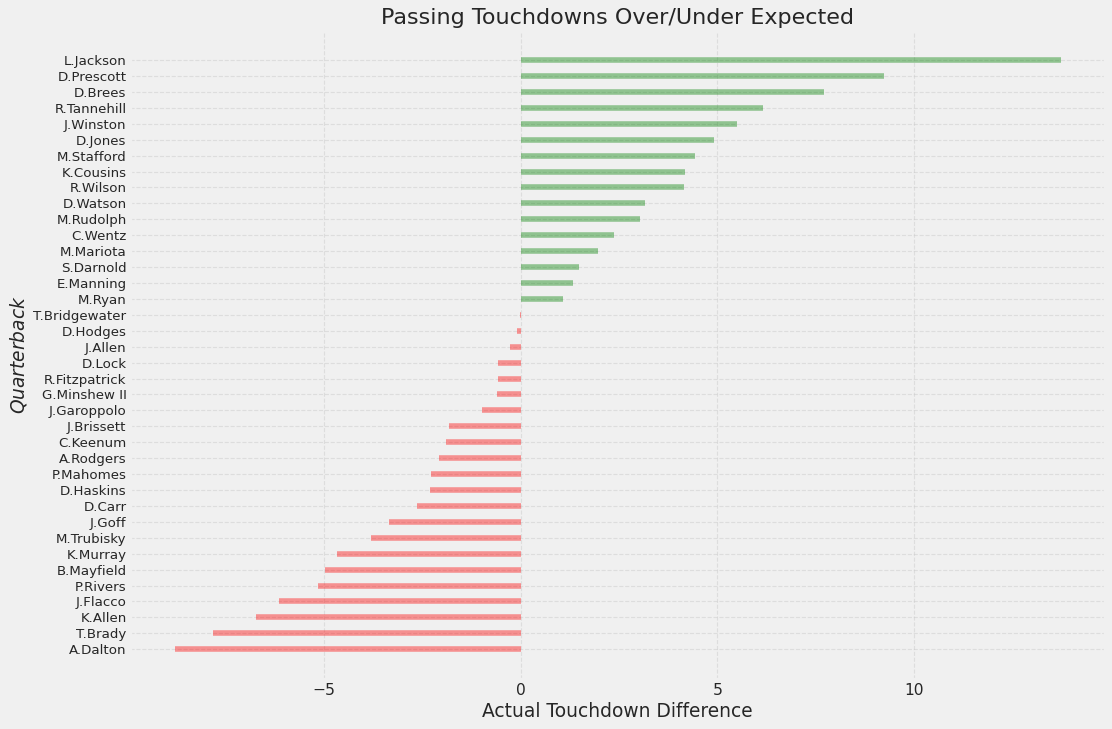

In [78]:
# Prepare Data
predicted = predicted[predicted['Actual Passing Touchdowns'] >= 5]
x = predicted.loc[:, ['Actual Touchdown Difference']]
predicted['colors'] = ['red' if x < 0 else 'green' for x in predicted['Actual Touchdown Difference']]
predicted.sort_values('Actual Touchdown Difference', inplace=True)
predicted.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=predicted.index, xmin=0, xmax=predicted['Actual Touchdown Difference'], color=predicted.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Quarterback$', xlabel='Actual Touchdown Difference')
plt.yticks(predicted.index, predicted.passer, fontsize=12)
plt.title('Passing Touchdowns Over/Under Expected', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

Suprises: Brady, Mahomes, Rodgers among underperformers; Rudolph, Mariota, Manning among overperformers.

**Applying Linear Regression for Visualizing how Passing Touchdowns affect Fantasy Points**

In [80]:
# Filter 1970-2019 yearly data for only quarterbacks
all_years_qb_df = all_years_df[all_years_df['Pos'] == 'QB']

In [81]:
# Displaying correlation coefficients between different features
correlation_columns = ['Cmp', 'PassingAtt', 'PassingYDs', 'Int', 'RushingAtt', 'RushingYDs', 'PassingTD', 'RushingTD', 'Fumbles','FantasyPoints']
correlation_df = all_years_qb_df[correlation_columns]
correlation_df.corr()

,Cmp,PassingAtt,PassingYDs,Int,RushingAtt,RushingYDs,PassingTD,RushingTD,Fumbles,FantasyPoints
Cmp,1.000000,0.992403,0.991346,0.794613,0.691331,0.481042,0.932135,0.422386,0.747128,0.955360
PassingAtt,0.992403,1.000000,0.988677,0.837477,0.703405,0.496194,0.919798,0.434518,0.771896,0.942269
PassingYDs,0.991346,0.988677,1.000000,0.808752,0.697816,0.489121,0.949563,0.438329,0.748263,0.966755
Int,0.794613,0.837477,0.808752,1.000000,0.562124,0.396200,0.727114,0.364519,0.700343,0.702523
RushingAtt,0.691331,0.703405,0.697816,0.562124,1.000000,0.917913,0.654851,0.706585,0.667676,0.775288
RushingYDs,0.481042,0.496194,0.489121,0.396200,0.917913,1.000000,0.461647,0.692240,0.498765,0.605264
PassingTD,0.932135,0.919798,0.949563,0.727114,0.654851,0.461647,1.000000,0.405564,0.663204,0.966776
RushingTD,0.422386,0.434518,0.438329,0.364519,0.706585,0.692240,0.405564,1.000000,0.412049,0.545680
Fumbles,0.747128,0.771896,0.748263,0.700343,0.667676,0.498765,0.663204,0.412049,1.000000,0.688575
FantasyPoints,0.955360,0.942269,0.966755,0.702523,0.775288,0.605264,0.966776,0.545680,0.688575,1.000000


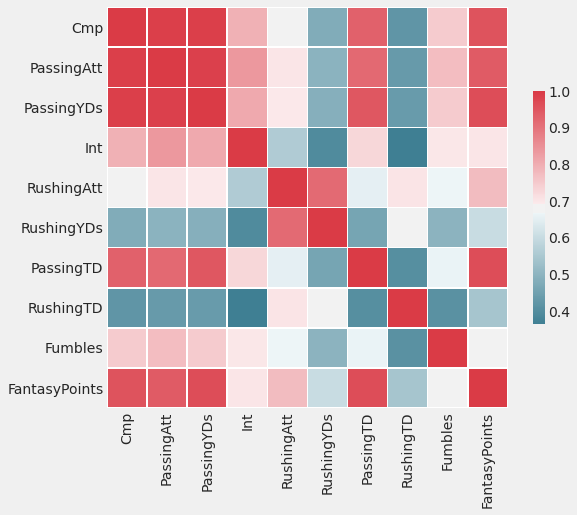

In [82]:
# Heatmap visualization for correlation
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_df.corr(),vmax=1, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

All features are positively correlated, even fumbles and interceptions, to fantasy points.

In [83]:
x = all_years_qb_df['PassingTD'].values.reshape(-1, 1)
y = all_years_qb_df['FantasyPoints'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm
y_pred = regressor.predict(x_test)

In [84]:
# Displaying a few model predictions in terms of fantasy points
regression_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
regression_df.head()

,Actual,Predicted
0,0.20,4.327079
1,1.30,4.327079
2,90.48,115.299506
3,273.10,291.005848
4,42.38,50.565590


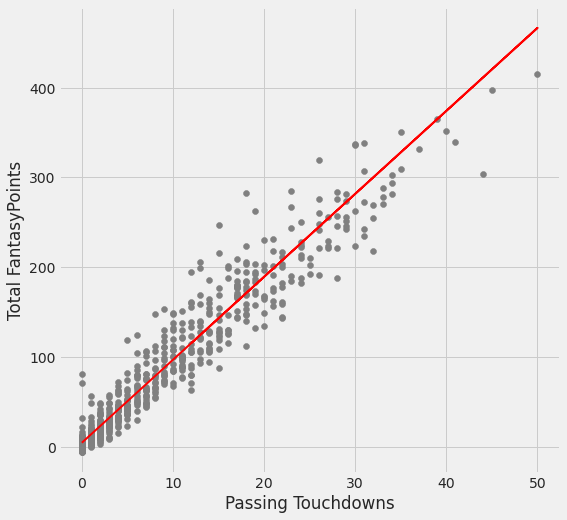

In [85]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('Passing Touchdowns')
plt.ylabel('Total FantasyPoints')
plt.show()

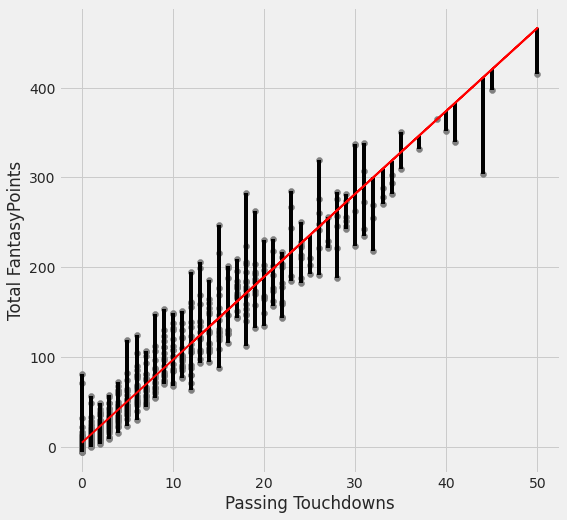

In [86]:
fig, ax = plt.subplots()

plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)

#plot the vertical distance between y_test and y_pred
ax.vlines(x_test, y_test, y_pred)

plt.xlabel('Passing Touchdowns')
plt.ylabel('Total FantasyPoints')
plt.show()

In [87]:
mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
rmse

21.966142156786937

The model predicts fantasy points for a given season within 21.9 points.

In [88]:
coeff_of_determination = r2_score(y_test, y_pred)
print('The coefficient of determination is', coeff_of_determination)

The coefficient of determination is 0.9342157966115899


The correlation between passing touchdowns and fantasy foints is very strong. If Tannehill regresses in passing touchdowns next season, his fantasy points will regress as well.

In [90]:
# Predict fantasy points based off 16 passing touchdowns (Tannehill had an expected 15.9)
regressor.predict([[16]])

array([[152.29031442]])

Tannehills predicted points based off his expected 16 passing touchdowns would be between 130 points and 174, Tannehill actually finished with 222 on the season.

In [91]:
# Predicting Peyton Manning's historic season for fun
regressor.predict([[55]])

array([[512.95070099]])